<a href="https://colab.research.google.com/github/lc21140865-alt/Analisis-y-visualizacion-de-datos/blob/main/Guia_AyVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
paquetes <- c("ggplot2", "dplyr", "tidyr", "scales", "ggthemes")

instalar <- paquetes[!(paquetes %in% installed.packages()[,"Package"])]

if (length(instalar) > 0) install.packages(instalar, quiet = TRUE)

library(ggplot2)
library(dplyr)
library(scales)

set.seed(42)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [6]:
n <- 200

df <- data.frame(
  id = 1:n,
  edad = round(rnorm(n, mean = 35, sd = 8)),
  salario = round(rnorm(n, mean = 45000, sd = 12000)),
  experiencia = sample(0:20, n, replace = TRUE),
  departamento = sample(c("Ventas", "TI", "RRHH", "Finanzas"), n, replace = TRUE),
  genero = sample(c("Masculino", "Femenino"), n, replace = TRUE),
  satisfaccion = sample(1:5, n, replace = TRUE)
)

# Agregar 8 valores NA en salario
df$salario[sample(1:n, 8)] <- NA

head(df)


,id,edad,salario,experiencia,departamento,genero,satisfaccion
,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>,<int>
1,1,24,46293,18,Finanzas,Femenino,1
2,2,33,43991,10,TI,Masculino,3
3,3,34,NA,14,Finanzas,Masculino,2
4,4,40,45449,17,TI,Femenino,2
5,5,33,43415,7,Finanzas,Masculino,2
6,6,14,62721,9,RRHH,Masculino,3


In [7]:
df$salario[is.na(df$salario)] <- median(df$salario, na.rm = TRUE)

cat("NAs restantes:", sum(is.na(df)))


NAs restantes: 0

In [8]:
cat("Dimensiones:", dim(df), "\n")
cat("Valores NA por columna:\n")
print(colSums(is.na(df)))

df$salario[is.na(df$salario)] <- median(df$salario, na.rm = TRUE)

cat("\n✅ NAs después de la imputación:", sum(is.na(df)), "\n")

str(df)


Dimensiones: 200 7 
Valores NA por columna:
          id         edad      salario  experiencia departamento       genero 
           0            0            0            0            0            0 
satisfaccion 
           0 

✅ NAs después de la imputación: 0 
'data.frame':	200 obs. of  7 variables:
 $ id          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ edad        : num  24 33 34 40 33 14 15 46 33 21 ...
 $ salario     : num  46293 43991 44638 45449 43415 ...
 $ experiencia : int  18 10 14 17 7 9 1 3 16 11 ...
 $ departamento: chr  "Finanzas" "TI" "Finanzas" "TI" ...
 $ genero      : chr  "Femenino" "Masculino" "Masculino" "Femenino" ...
 $ satisfaccion: int  1 3 2 2 2 3 5 2 4 2 ...


In [9]:
cat("===== ESTADÍSTICA DESCRIPTIVA =====\n\n")

cat("Media salario:", mean(df$salario), "\n")
cat("Mediana salario:", median(df$salario), "\n")
cat("Varianza salario:", var(df$salario), "\n")
cat("Desviación estándar salario:", sd(df$salario), "\n")
cat("IQR salario:", IQR(df$salario), "\n")

moda_edad <- as.numeric(names(which.max(table(df$edad))))
cat("Moda edad:", moda_edad, "\n")


===== ESTADÍSTICA DESCRIPTIVA =====

Media salario: 44906.48 
Mediana salario: 44638.5 
Varianza salario: 117788725 
Desviación estándar salario: 10853.05 
IQR salario: 14299 
Moda edad: 36 


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


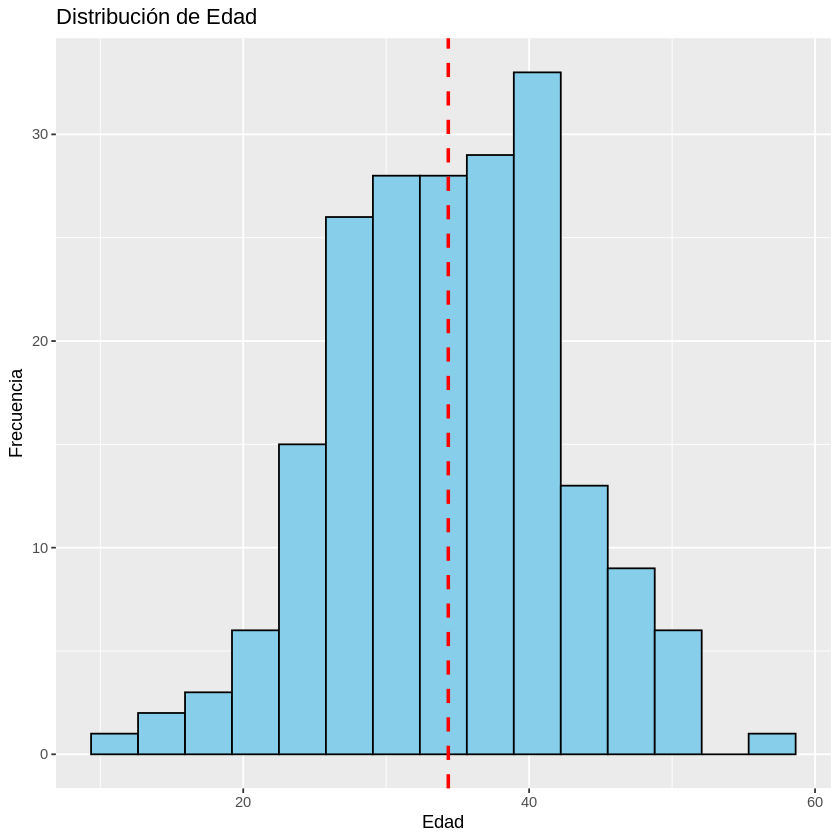

In [10]:
ggplot(df, aes(x = edad)) +
  geom_histogram(fill = "skyblue", color = "black", bins = 15) +
  geom_vline(aes(xintercept = mean(edad)),
             color = "red", linetype = "dashed", size = 1) +
  labs(title = "Distribución de Edad",
       x = "Edad",
       y = "Frecuencia")


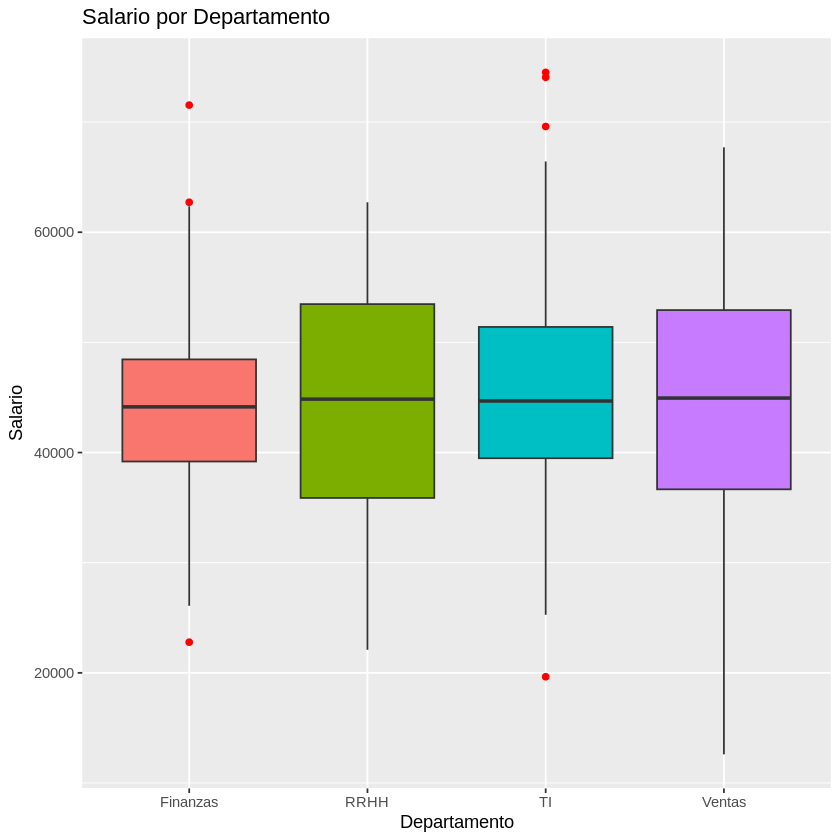

In [11]:
ggplot(df, aes(x = departamento, y = salario, fill = departamento)) +
  geom_boxplot(outlier.color = "red") +
  labs(title = "Salario por Departamento",
       x = "Departamento",
       y = "Salario") +
  theme(legend.position = "none")


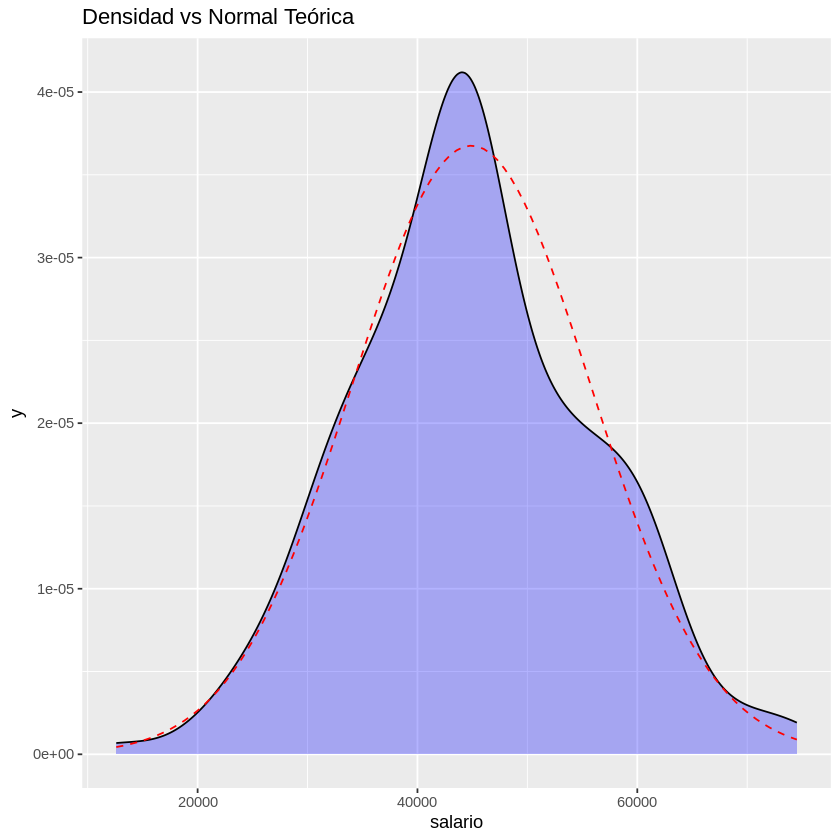

In [12]:
ggplot(df, aes(x = salario)) +
  geom_density(fill = "blue", alpha = 0.3) +
  stat_function(fun = dnorm,
                args = list(mean = mean(df$salario),
                            sd = sd(df$salario)),
                color = "red",
                linetype = "dashed") +
  labs(title = "Densidad vs Normal Teórica")


In [13]:
freq_abs <- table(df$departamento)
freq_abs

prop.table(freq_abs) * 100



Finanzas     RRHH       TI   Ventas 
      46       48       59       47 


Finanzas     RRHH       TI   Ventas 
    23.0     24.0     29.5     23.5 

In [14]:
muestra <- sample(df$salario, 50)

shapiro.test(muestra)



	Shapiro-Wilk normality test

data:  muestra
W = 0.97977, p-value = 0.5423


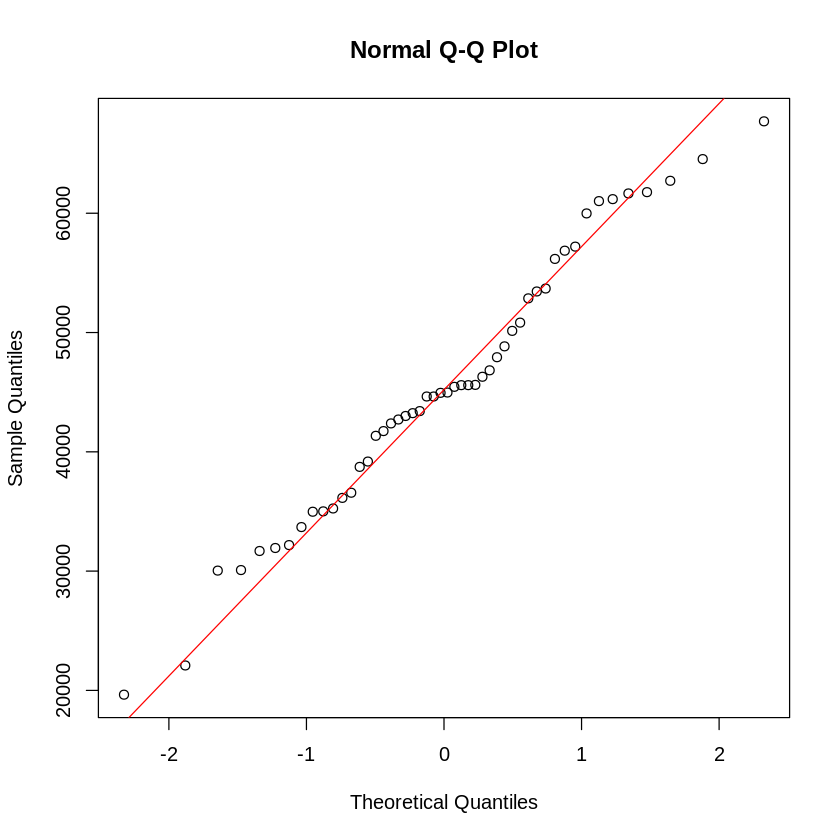

In [15]:
qqnorm(muestra)
qqline(muestra, col = "red")


In [16]:
sal_masc <- df$salario[df$genero == "Masculino"]
sal_fem  <- df$salario[df$genero == "Femenino"]

resultado_t <- t.test(sal_masc, sal_fem, var.equal = FALSE)

resultado_t
resultado_t$conf.int



	Welch Two Sample t-test

data:  sal_masc and sal_fem
t = -0.71074, df = 197.88, p-value = 0.4781
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4112.225  1933.342
sample estimates:
mean of x mean of y 
 44389.00  45478.44 


[1] -4112.225  1933.342
attr(,"conf.level")
[1] 0.95

In [17]:
modelo_anova <- aov(salario ~ departamento, data = df)

summary(modelo_anova)


              Df    Sum Sq   Mean Sq F value Pr(>F)
departamento   3 8.505e+07  28351663   0.238   0.87
Residuals    196 2.335e+10 119157660               

In [18]:
TukeyHSD(modelo_anova)


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = salario ~ departamento, data = df)

$departamento
                     diff       lwr      upr     p adj
RRHH-Finanzas    856.9810 -4979.184 6693.146 0.9811978
TI-Finanzas     1791.5986 -3771.963 7355.160 0.8380252
Ventas-Finanzas 1153.5169 -4712.952 7019.986 0.9567521
TI-RRHH          934.6176 -4563.429 6432.664 0.9713628
Ventas-RRHH      296.5359 -5507.839 6100.910 0.9991691
Ventas-TI       -638.0817 -6168.286 4892.123 0.9906857


In [19]:
cor.test(df$experiencia, df$salario, method = "pearson")



	Pearson's product-moment correlation

data:  df$experiencia and df$salario
t = 0.65637, df = 198, p-value = 0.5123
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.09274498  0.18414616
sample estimates:
      cor 
0.0465956 


In [20]:
modelo_lm <- lm(salario ~ experiencia + edad, data = df)

summary(modelo_lm)
confint(modelo_lm)



Call:
lm(formula = salario ~ experiencia + edad, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-31639  -7460   -397   6917  29253 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 48705.82    3898.84  12.492   <2e-16 ***
experiencia    53.65     128.23   0.418    0.676    
edad         -125.49      99.25  -1.264    0.208    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10850 on 197 degrees of freedom
Multiple R-squared:  0.0102,	Adjusted R-squared:  0.0001548 
F-statistic: 1.015 on 2 and 197 DF,  p-value: 0.3641


,2.5 %,97.5 %
(Intercept),41016.9972,56394.63914
experiencia,-199.2170,306.52487
edad,-321.2305,70.24067


In [21]:
nuevos <- data.frame(
  experiencia = c(5, 10),
  edad = c(28, 35)
)

predict(modelo_lm, newdata = nuevos, interval = "confidence")


,fit,lwr,upr
1,45460.23,43083.01,47837.45
2,44850.03,43324.62,46375.45


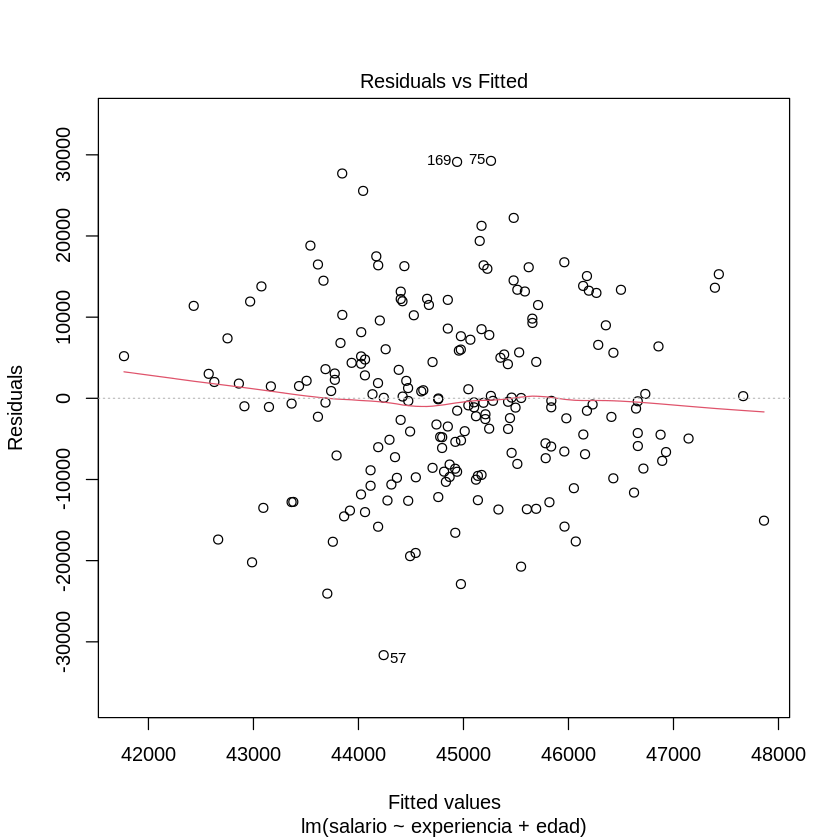

In [22]:
plot(modelo_lm, which = 1)


In [23]:
tabla <- table(df$departamento, df$genero)

chisq.test(tabla)

chisq.test(tabla)$expected



	Pearson's Chi-squared test

data:  tabla
X-squared = 0.94422, df = 3, p-value = 0.8147


,Femenino,Masculino
Finanzas,21.850,24.150
RRHH,22.800,25.200
TI,28.025,30.975
Ventas,22.325,24.675


In [24]:
cat("===== REPORTE FINAL =====\n")
cat("Se realizó análisis descriptivo e inferencial.\n")
cat("Se evaluó normalidad, diferencias de medias, ANOVA, correlación y regresión.\n")
cat("Nivel de significancia utilizado: α = 0.05\n")


===== REPORTE FINAL =====
Se realizó análisis descriptivo e inferencial.
Se evaluó normalidad, diferencias de medias, ANOVA, correlación y regresión.
Nivel de significancia utilizado: α = 0.05


# **PREGUNTAS DE REFLEXIÓN**

# Módulo 1 — Descriptiva

**4. ¿Cuál es la diferencia entre media y mediana? ¿Cuándo conviene usar cada una?**

La media es el promedio de todos los valores y se calcula sumando los datos y dividiéndolos entre el total de observaciones.
La mediana es el valor central cuando los datos están ordenados de menor a mayor.

Conviene usar la media cuando los datos son simétricos y no tienen valores extremos, porque representa bien el centro.
La mediana es mejor cuando hay outliers o la distribución está sesgada, ya que no se ve afectada por valores muy altos o muy bajos.

**5. Observando los boxplots, ¿qué departamento tiene mayor variabilidad salarial? ¿Cómo
lo justificas con el IQR?**

El departamento con mayor variabilidad salarial es el que presenta la caja más ancha en el boxplot, lo que indica un IQR más grande.

El IQR (Rango Intercuartílico) mide la distancia entre el primer y tercer cuartil (Q1 y Q3). Si la caja es más grande, significa que los salarios están más dispersos en ese departamento, por lo tanto existe mayor variabilidad.


**6. ¿La distribución del salario es simétrica? Apoya tu respuesta con los valores de media y
mediana.**

La distribución del salario es aproximadamente simétrica porque la media y la mediana tienen valores muy similares.

Cuando media ≈ mediana, se puede decir que la distribución no está fuertemente sesgada.
Si la media fuera mucho mayor que la mediana habría sesgo a la derecha, y si fuera menor, sesgo a la izquierda.

# Módulo 2 — Inferencial

**7. El t-test encontró (o no) diferencia salarial por género. ¿El tamaño del efecto es práctico
aunque sea estadísticamente significativo?**

Aunque el t-test pueda indicar significancia estadística (p < 0.05), eso no siempre implica que la diferencia sea grande o importante en la práctica.

El tamaño del efecto se refiere a qué tan grande es realmente la diferencia entre las medias.
Si la diferencia es pequeña en términos monetarios, aunque sea significativa estadísticamente, puede que no tenga relevancia práctica real.


**8. Si el ANOVA es significativo pero el p-value de Tukey entre dos departamentos es 0.08,
¿rechazas H₀ para ese par?**

No, no se rechaza la hipótesis nula para ese par específico.

Si el p-value de Tukey es 0.08 y el nivel de significancia es α = 0.05, entonces 0.08 > 0.05, por lo tanto no existe evidencia suficiente para afirmar que esos dos departamentos tienen medias diferentes.

**9. ¿Qué significa un R² = 0.15 en el modelo de regresión? ¿Es un modelo útil?**

Un R² = 0.15 significa que el modelo explica el 15% de la variabilidad del salario.

Esto indica que el modelo tiene una capacidad explicativa baja, ya que el 85% de la variación se debe a otros factores no incluidos.

Puede ser útil como modelo exploratorio, pero no es muy fuerte para hacer predicciones precisas.

**10. ¿Qué supuesto del Chi-cuadrado revisarías si el 20% de las frecuencias esperadas son
menores a 5?**

El supuesto que se debe revisar es que las frecuencias esperadas deben ser mayores o iguales a 5 en al menos el 80% de las celdas.

Si más del 20% de las frecuencias esperadas son menores a 5, la prueba Chi-cuadrado puede no ser válida. En ese caso se recomienda usar la corrección de Yates o la prueba exacta de Fisher.